In [33]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import lines
from matplotlib import colors as mcolors



# 1.1 Explicit strong scaling

In [35]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Report/stats/strongscaling/explicit"
files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_strongscaling_explicit_10000_it")]
print(files)

all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df[0:1])

combined_df = pd.concat(all_dataframes)


['statistics_strongscaling_explicit_10000_it_1-14-on-2019-12-22_12-26-02', 'statistics_strongscaling_explicit_10000_it_10-1-on-2019-12-22_12-23-52', 'statistics_strongscaling_explicit_10000_it_12-1-on-2019-12-22_12-23-52', 'statistics_strongscaling_explicit_10000_it_1-12-on-2019-12-22_12-25-57', 'statistics_strongscaling_explicit_10000_it_14-1-on-2019-12-22_12-23-38', 'statistics_strongscaling_explicit_10000_it_2-1-on-2019-12-22_12-23-44', 'statistics_strongscaling_explicit_10000_it_10-1-on-2019-12-22_12-23-45', 'statistics_strongscaling_explicit_10000_it_1-1-on-2019-12-22_12-25-52', 'statistics_strongscaling_explicit_10000_it_1-8-on-2019-12-22_12-25-57', 'statistics_strongscaling_explicit_10000_it_1-12-on-2019-12-22_12-25-54', 'statistics_strongscaling_explicit_10000_it_12-1-on-2019-12-22_12-23-44', 'statistics_strongscaling_explicit_10000_it_16-1-on-2019-12-22_12-23-44', 'statistics_strongscaling_explicit_10000_it_1-2-on-2019-12-22_12-26-01', 'statistics_strongscaling_explicit_10000_

In [36]:
combined_df.sort_values(by=['Number of processes', 'Number of threads'])

,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,0,0,1,1,362.233590,2000.0,2000.0,0.05,0,0.0
0,0,0,1,1,353.778839,2000.0,2000.0,0.05,0,0.0
0,0,0,1,1,355.751882,2000.0,2000.0,0.05,0,0.0
0,0,0,1,1,368.100116,2000.0,2000.0,0.05,0,0.0
0,0,0,1,1,359.074194,2000.0,2000.0,0.05,0,0.0
0,0,0,1,1,359.731398,2000.0,2000.0,0.05,0,0.0
0,0,0,1,2,217.872478,2000.0,2000.0,0.05,0,0.0
0,0,0,1,2,597.270219,2000.0,2000.0,0.05,0,0.0
0,0,0,1,2,209.243813,2000.0,2000.0,0.05,0,0.0
0,0,0,1,4,137.803080,2000.0,2000.0,0.05,0,0.0


In [37]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).median().reset_index()
groupby_df

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,0,0,359.402796,2000.0,2000.0,0.05,0,0.0
1,1,2,0,0,217.872478,2000.0,2000.0,0.05,0,0.0
2,1,4,0,0,143.829952,2000.0,2000.0,0.05,0,0.0
3,1,8,0,0,95.846247,2000.0,2000.0,0.05,0,0.0
4,1,10,0,0,97.184099,2000.0,2000.0,0.05,0,0.0
5,1,12,0,0,95.565994,2000.0,2000.0,0.05,0,0.0
6,1,14,0,0,95.521957,2000.0,2000.0,0.05,0,0.0
7,1,16,0,0,89.462679,2000.0,2000.0,0.05,0,0.0
8,2,1,0,0,179.801311,2000.0,2000.0,0.05,0,0.0
9,4,1,0,0,90.050510,2000.0,2000.0,0.05,0,0.0


In [38]:
groupby_df['Number of processes']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      4
10     8
11    10
12    12
13    14
14    16
Name: Number of processes, dtype: int64

## 1.1.1 Plot average time as a function of process number number


[1, 2, 4, 8, 10, 12, 14, 16]
[array([359.402796]), array([179.801311]), array([90.05051]), array([46.293716]), array([37.088641]), array([31.411283]), array([26.647008]), array([23.494702])]
<class 'list'>
[array([359.402796]), array([179.701398]), array([89.850699]), array([44.9253495]), array([35.9402796]), array([29.950233]), array([25.67162829]), array([22.46267475])]
[array([1.]), array([1.99888863]), array([3.99112449]), array([7.76353309]), array([9.69037383]), array([11.44183751]), array([13.48754787]), array([15.2971847])]
[1, 2, 4, 8, 10, 12, 14, 16]


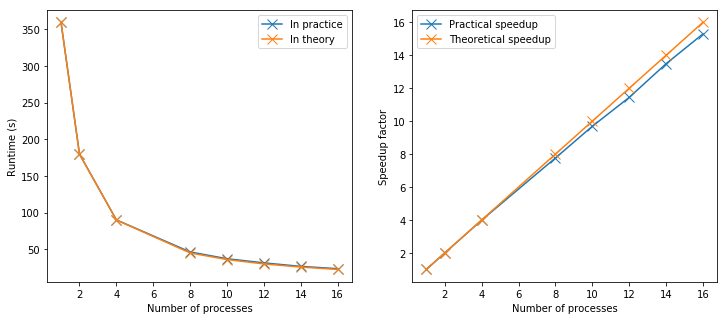

In [41]:
# Plot average time as a function of process number number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueProcesses = groupby_df['Number of processes'].unique()
for index,i in enumerate(uniqueProcesses):
    condition = (groupby_df['Number of processes'] == i) & (groupby_df['Number of threads'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
    
meanTime = [x for y, x in sorted(zip(uniqueProcesses, meanTimePerNbThreads))]
# meanTime = meanTimePerNbThreads
nbProcess = sorted(uniqueProcesses)
print(nbProcess)
print(meanTime)
print(type(meanTimePerNbThreads))

ax1.plot(nbProcess, meanTimePerNbThreads, marker='x',markersize=10)

for i in nbProcess:
    theoreticalMeanTime.append(meanTime[0]/i)

print(theoreticalMeanTime)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, nbProcess, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of processes")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Explicit_runtime_Speedup_processes.svg")

## 1.1.2 Plot average time as a function of thread number


[array([359.402796]), array([217.872478]), array([143.829952]), array([95.846247]), array([97.184099]), array([95.565994]), array([95.521957]), array([89.462679])]
[1, 2, 4, 8, 10, 12, 14, 16]
[array([359.402796]), array([179.701398]), array([89.850699]), array([44.9253495]), array([35.9402796]), array([29.950233]), array([25.67162829]), array([22.46267475])]
[array([1.]), array([1.64960164]), array([2.49880356]), array([3.74978476]), array([3.69816461]), array([3.76078123]), array([3.762515]), array([4.01734891])]
[1, 2, 4, 8, 10, 12, 14, 16]


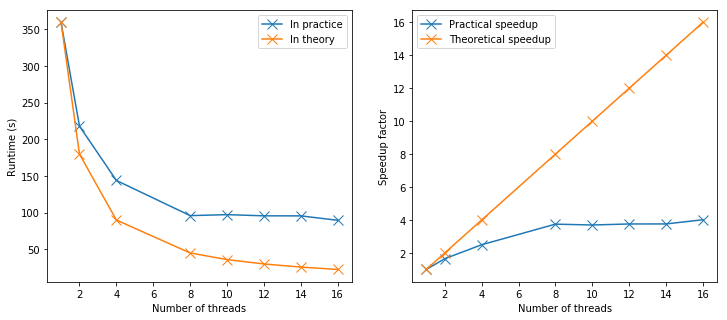

In [43]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueThreads = groupby_df['Number of threads'].unique()
for index,i in enumerate(uniqueThreads):
    condition = (groupby_df['Number of threads'] == i) & (groupby_df['Number of processes'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
meanTimePerNbThreads

    
meanTime = [x for y, x in sorted(zip(groupby_df['Number of threads'].unique(), meanTimePerNbThreads))]
print(meanTime)
nbThreads = sorted(groupby_df['Number of threads'].unique())
print(nbThreads)
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)

for i in nbThreads:
    theoreticalMeanTime.append(meanTime[0]/i)
print(theoreticalMeanTime)
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of threads")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of thread number
speedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbThreads)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, nbThreads, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Explicit_runtime_Speedup_threads.svg")

# 1.2 Explicit weak scaling


In [51]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Report/stats/weakscaling/explicit/process"

files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_explicit_weakscaling")]

all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df[0:1])

combined_df = pd.concat(all_dataframes)
combined_df = combined_df.dropna()
combined_df.sort_values(by=['Number of processes', 'Number of threads'], inplace=True)

# pd.set_option('display.max_rows', 1000)
combined_df

,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,0,0,1,1,162.542484,4000.0,1890.0,0.05,1,0.0
0,0,0,1,1,168.208728,4000.0,1890.0,0.05,1,0.0
0,0,0,1,1,169.612678,4000.0,1890.0,0.05,1,0.0
0,0,0,1,1,167.510294,4000.0,1890.0,0.05,1,0.0
0,0,0,1,1,164.420053,4000.0,1890.0,0.05,1,0.0
0,0,0,1,1,171.284159,4000.0,1890.0,0.05,1,0.0
0,0,0,2,1,166.619272,2000.0,1890.0,0.05,1,0.0
0,0,0,2,1,169.747166,2000.0,1890.0,0.05,1,0.0
0,0,0,2,1,172.907961,2000.0,1890.0,0.05,1,0.0
0,0,2,4,1,172.233968,1000.0,1890.0,0.05,1,0.0


In [52]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).median().reset_index()
groupby_df.sort_values(by=['Number of processes', 'Number of threads'])

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,0,0,167.859511,4000.0,1890.0,0.05,1,0.0
1,2,1,0,0,169.747166,2000.0,1890.0,0.05,1,0.0
2,4,1,0,2,172.233968,1000.0,1890.0,0.05,1,0.0
3,8,1,0,7,177.955306,500.0,1890.0,0.05,1,0.0
4,10,1,0,9,171.720789,400.0,1890.0,0.05,1,0.0
5,12,1,0,11,173.678895,333.0,1890.0,0.05,1,0.0
6,14,1,0,13,171.237076,285.0,1890.0,0.05,1,0.0
7,16,1,0,15,175.376409,250.0,1890.0,0.05,1,0.0


## 1.2.1 Plot average time as a function of process number


[1, 2, 4, 8, 10, 12, 14, 16]
[array([167.859511]), array([169.747166]), array([172.233968]), array([177.955306]), array([171.720789]), array([173.678895]), array([171.237076]), array([175.376409])]
[array([167.859511]), array([167.859511]), array([167.859511]), array([167.859511]), array([167.859511]), array([167.859511]), array([167.859511]), array([167.859511])]
[array([1.]), array([0.98887961]), array([0.97460166]), array([0.94326781]), array([0.97751421]), array([0.96649343]), array([0.9802755]), array([0.95713849])]
[1, 2, 4, 8, 10, 12, 14, 16]


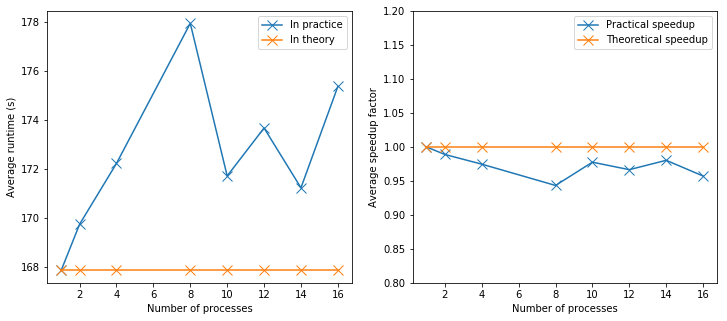

In [53]:
# Plot average time as a function of process number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueProcesses = groupby_df['Number of processes'].unique()
for index,i in enumerate(uniqueProcesses):
    condition = (groupby_df['Number of processes'] == i) & (groupby_df['Number of threads'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
meanTimePerNbThreads

    
meanTime = [x for y, x in sorted(zip(uniqueProcesses, meanTimePerNbThreads))]
nbProcess = sorted(uniqueProcesses)
print(nbProcess)
print(meanTime)
ax1.plot(nbProcess, meanTime, marker='x',markersize=10)

theoreticalMeanTime = [meanTime[0]] * len(nbProcess)

print(theoreticalMeanTime)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Average runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, [1]*len(nbProcess), marker='x',markersize=10)
ax2.set(ylabel="Average speedup factor", xlabel="Number of processes")
ax2.set_ylim([0.8,1.2])
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Weakscaling_processes_runtime_speedup.svg")

In [55]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Report/stats/weakscaling/explicit/threads"

files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_explicit_weakscaling")]

all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df[0:1])

combined_df = pd.concat(all_dataframes)
combined_df = combined_df.dropna()
combined_df.sort_values(by=['Number of processes', 'Number of threads'], inplace=True)

# pd.set_option('display.max_rows', 1000)
combined_df


,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,0,0,1,1,332.463890,2000.0,1890.0,0.05,1,0.0
0,0,0,1,1,332.411839,2000.0,1890.0,0.05,1,0.0
0,0,0,1,1,335.207240,2000.0,1890.0,0.05,1,0.0
0,0,0,1,2,357.797146,2000.0,945.0,0.05,1,0.0
0,0,0,1,2,344.186569,2000.0,945.0,0.05,1,0.0
0,0,0,1,2,339.472659,2000.0,945.0,0.05,1,0.0
0,0,0,1,4,359.261695,2000.0,472.0,0.05,1,0.0
0,0,0,1,4,361.878526,2000.0,472.0,0.05,1,0.0
0,0,0,1,4,346.337103,2000.0,472.0,0.05,1,0.0
0,0,0,1,8,361.479957,2000.0,236.0,0.05,1,0.0


In [56]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).median().reset_index()
groupby_df

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,0,0,332.463890,2000.0,1890.0,0.05,1,0.0
1,1,2,0,0,344.186569,2000.0,945.0,0.05,1,0.0
2,1,4,0,0,359.261695,2000.0,472.0,0.05,1,0.0
3,1,8,0,0,362.043816,2000.0,236.0,0.05,1,0.0
4,1,10,0,0,382.578593,2000.0,188.0,0.05,1,0.0
5,1,12,0,0,422.580199,2000.0,157.0,0.05,1,0.0
6,1,14,0,0,406.320679,2000.0,134.0,0.05,1,0.0
7,1,16,0,0,402.275874,2000.0,118.0,0.05,1,0.0


## 1.2.2 Plot average time/speedup as a function of thread number


[array([332.46389]), array([344.186569]), array([359.261695]), array([362.043816]), array([382.578593]), array([422.580199]), array([406.320679]), array([402.2758745])]
[1, 2, 4, 8, 10, 12, 14, 16]
[array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389])]
[array([1.]), array([0.96594092]), array([0.92540868]), array([0.91829739]), array([0.86900808]), array([0.78674744]), array([0.8182303]), array([0.82645744])]
[1, 2, 4, 8, 10, 12, 14, 16]


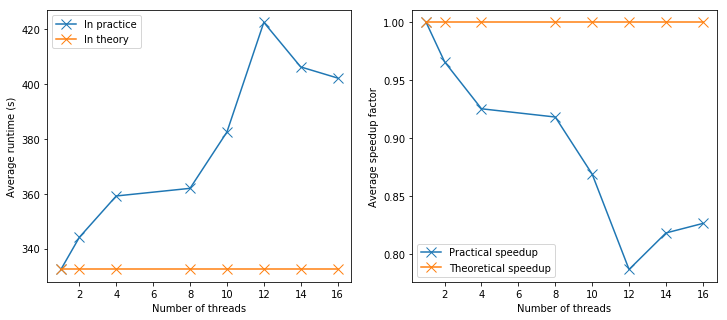

In [57]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueThreads = groupby_df['Number of threads'].unique()
for index,i in enumerate(uniqueThreads):
    condition = (groupby_df['Number of threads'] == i) & (groupby_df['Number of processes'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)

meanTimePerNbThreads

    
# # plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(groupby_df['Number of threads'].unique(), meanTimePerNbThreads))]
print(meanTime)
# print(meanTime)
nbThreads = sorted(groupby_df['Number of threads'].unique())
print(nbThreads)
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)

theoreticalMeanTime = [meanTime[0]] * len(nbThreads)

print(theoreticalMeanTime)
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Average runtime (s)",xlabel="Number of threads")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbThreads)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, [1]*len(nbThreads), marker='x',markersize=10)
ax2.set(ylabel="Average speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Weakscaling_threads_runtime_speedup.svg")

# 2.1 Implicit strong scaling

In [3]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Report/stats/strongscaling/implicit/NEW2"
files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_strongscaling_implicit")]
print(files)

all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df[0:1])

combined_df = pd.concat(all_dataframes)


['statistics_strongscaling_implicit_100_it_1-1-on-2019-12-22_23-47-07', 'statistics_strongscaling_implicit_100_it_1-10-on-2019-12-22_23-50-54', 'statistics_strongscaling_implicit_100_it_1-16-on-2019-12-22_23-47-04', 'statistics_strongscaling_implicit_100_it_1-2-on-2019-12-22_23-47-07', 'statistics_strongscaling_implicit_100_it_1-14-on-2019-12-22_23-47-07', 'statistics_strongscaling_implicit_100_it_1-16-on-2019-12-22_23-47-07', 'statistics_strongscaling_implicit_100_it_1-10-on-2019-12-22_23-47-04', 'statistics_strongscaling_implicit_100_it_1-8-on-2019-12-22_23-55-05', 'statistics_strongscaling_implicit_100_it_1-8-on-2019-12-22_23-47-07', 'statistics_strongscaling_implicit_100_it_1-8-on-2019-12-22_23-47-04', 'statistics_strongscaling_implicit_100_it_1-12-on-2019-12-22_23-50-12', 'statistics_strongscaling_implicit_100_it_1-10-on-2019-12-22_23-50-12', 'statistics_strongscaling_implicit_100_it_1-14-on-2019-12-22_23-47-04', 'statistics_strongscaling_implicit_100_it_1-4-on-2019-12-22_23-47-07

In [4]:
combined_df.sort_values(by=['Number of processes', 'Number of threads'])

,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,0,1,1,498.111856,25000.0,25000.0,0.05,0,0.01
0,1,0,1,2,497.376795,25000.0,25000.0,0.05,0,0.01
0,1,0,1,4,496.943985,25000.0,25000.0,0.05,0,0.01
0,1,0,1,8,500.214063,25000.0,25000.0,0.05,0,0.01
0,1,0,1,8,496.876877,25000.0,25000.0,0.05,0,0.01
0,1,0,1,8,499.537930,25000.0,25000.0,0.05,0,0.01
0,1,0,1,10,498.322667,25000.0,25000.0,0.05,0,0.01
0,1,0,1,10,497.387644,25000.0,25000.0,0.05,0,0.01
0,1,0,1,10,499.507382,25000.0,25000.0,0.05,0,0.01
0,1,0,1,12,498.314341,25000.0,25000.0,0.05,0,0.01


In [5]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).median().reset_index()
groupby_df

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,1,0,498.111856,25000.0,25000.0,0.05,0,0.01
1,1,2,1,0,497.376795,25000.0,25000.0,0.05,0,0.01
2,1,4,1,0,496.943985,25000.0,25000.0,0.05,0,0.01
3,1,8,1,0,499.537930,25000.0,25000.0,0.05,0,0.01
4,1,10,1,0,498.322667,25000.0,25000.0,0.05,0,0.01
5,1,12,1,0,498.314341,25000.0,25000.0,0.05,0,0.01
6,1,14,1,0,497.533466,25000.0,25000.0,0.05,0,0.01
7,1,16,1,0,496.911894,25000.0,25000.0,0.05,0,0.01


## 2.1.1 Plot average time as a function of process number number


[1, 2, 4, 8, 10, 12, 14, 16]
[array([507.612483]), array([264.217771]), array([139.9840305]), array([70.7114275]), array([55.61374]), array([46.374818]), array([48.8687075]), array([45.8525985])]
<class 'list'>
[array([507.612483]), array([253.8062415]), array([126.90312075]), array([63.45156037]), array([50.7612483]), array([42.30104025]), array([36.2580345]), array([31.72578019])]
[array([1.]), array([1.92118979]), array([3.62621708]), array([7.1786485]), array([9.12746532]), array([10.94586469]), array([10.38727048]), array([11.07052816])]
[1, 2, 4, 8, 10, 12, 14, 16]


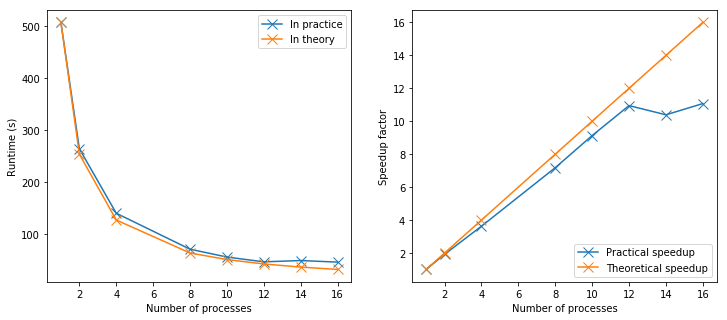

In [7]:
# Plot average time as a function of process number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueProcesses = groupby_df['Number of processes'].unique()
for index,i in enumerate(uniqueProcesses):
    condition = (groupby_df['Number of processes'] == i) & (groupby_df['Number of threads'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
    
meanTime = [x for y, x in sorted(zip(uniqueProcesses, meanTimePerNbThreads))]
# meanTime = meanTimePerNbThreads
nbProcess = sorted(uniqueProcesses)
print(nbProcess)
print(meanTime)
print(type(meanTimePerNbThreads))

ax1.plot(nbProcess, meanTimePerNbThreads, marker='x',markersize=10)

for i in nbProcess:
    theoreticalMeanTime.append(meanTime[0]/i)

print(theoreticalMeanTime)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, nbProcess, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of processes")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Implicit_runtime_Speedup_processes.svg")

## 2.1.2 Plot average time as a function of thread number


[array([498.111856]), array([497.376795]), array([496.943985]), array([499.53793]), array([498.322667]), array([498.314341]), array([497.5334655]), array([496.911894])]
[1, 2, 4, 8, 10, 12, 14, 16]
[array([498.111856]), array([249.055928]), array([124.527964]), array([62.263982]), array([49.8111856]), array([41.50932133]), array([35.57941829]), array([31.131991])]
[array([1.]), array([1.00147788]), array([1.00235011]), array([0.99714521]), array([0.99957696]), array([0.99959366]), array([1.00116252]), array([1.00241484])]
[1, 2, 4, 8, 10, 12, 14, 16]


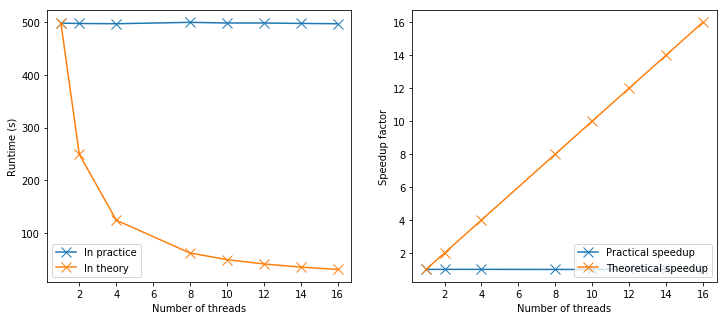

In [6]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueThreads = groupby_df['Number of threads'].unique()
for index,i in enumerate(uniqueThreads):
    condition = (groupby_df['Number of threads'] == i) & (groupby_df['Number of processes'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
meanTimePerNbThreads

    
meanTime = [x for y, x in sorted(zip(groupby_df['Number of threads'].unique(), meanTimePerNbThreads))]
print(meanTime)
nbThreads = sorted(groupby_df['Number of threads'].unique())
print(nbThreads)
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)

for i in nbThreads:
    theoreticalMeanTime.append(meanTime[0]/i)
print(theoreticalMeanTime)
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of threads")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of thread number
speedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbThreads)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, nbThreads, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='best')

fig.savefig("Implicit_runtime_Speedup_threads.svg")

# 2.2 Implicit weak scaling

In [66]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Report/stats/weakscaling/implicit"
files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_implicit_weakscaling") and filename.find('23') != -1]

all_dataframes = []
for f in files:
    print(f)
    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df[0:1])
combined_df = pd.concat(all_dataframes)

statistics_implicit_weakscaling_threads_1-14-on-2019-12-22_23-28-30
statistics_implicit_weakscaling_processes_12-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_processes_10-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_processes_14-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_processes_8-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_1-8-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_1-16-on-2019-12-22_23-28-30
statistics_implicit_weakscaling_threads_1-4-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_1-10-on-2019-12-22_23-28-30
statistics_implicit_weakscaling_processes_2-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_processes_16-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_1-2-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_1-12-on-2019-12-22_23-28-30
statistics_implicit_weakscaling_processes_1-1-on-2019-12-22_23-24-32
statistics_implicit_weakscaling_threads_

In [69]:
pd.set_option('display.max_rows', 1000) 
combined_df.sort_values(by=['Number of processes', 'Number of threads'])


,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,0,1,1,51.427175,80000.0,25000.0,0.05,0,0.01
0,1,0,1,1,50.796640,25000.0,80000.0,0.05,0,0.01
0,1,0,1,2,200.211023,25000.0,40000.0,0.05,0,0.01
0,1,0,1,4,774.136922,25000.0,20000.0,0.05,0,0.01
0,1,1,2,1,103.600914,40000.0,25000.0,0.05,0,0.01
0,1,3,4,1,212.799876,20000.0,25000.0,0.05,0,0.01
0,1,7,8,1,417.173017,10000.0,25000.0,0.05,0,0.01
0,1,0,10,1,518.095075,8000.0,25000.0,0.05,0,0.01
0,1,0,12,1,614.797140,6666.0,25000.0,0.05,0,0.01
0,1,2,14,1,714.115037,5714.0,25000.0,0.05,0,0.01


In [18]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).median().reset_index()
groupby_df

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,1,0,51.111908,52500.0,52500.0,0.05,0,0.01
1,1,2,1,0,200.211023,25000.0,40000.0,0.05,0,0.01
2,1,4,1,0,774.136922,25000.0,20000.0,0.05,0,0.01
3,2,1,1,1,103.600914,40000.0,25000.0,0.05,0,0.01
4,4,1,1,3,212.799876,20000.0,25000.0,0.05,0,0.01
5,8,1,1,7,417.173017,10000.0,25000.0,0.05,0,0.01
6,10,1,1,0,518.095075,8000.0,25000.0,0.05,0,0.01
7,12,1,1,0,614.797140,6666.0,25000.0,0.05,0,0.01
8,14,1,1,2,714.115037,5714.0,25000.0,0.05,0,0.01
9,16,1,1,14,818.410804,5000.0,25000.0,0.05,0,0.01


## 2.2.1 Plot average time as a function of process number


[1, 2, 4, 8, 10, 12, 14, 16]
[array([51.1119075]), array([103.600914]), array([212.799876]), array([417.173017]), array([518.095075]), array([614.79714]), array([714.115037]), array([818.410804])]
[array([51.1119075]), array([51.1119075]), array([51.1119075]), array([51.1119075]), array([51.1119075]), array([51.1119075]), array([51.1119075]), array([51.1119075])]
[array([1.]), array([0.49335383]), array([0.24018768]), array([0.12251969]), array([0.09865353]), array([0.08313622]), array([0.07157377]), array([0.06245263])]
[1, 2, 4, 8, 10, 12, 14, 16]
[1.0, 0.5, 0.25, 0.125, 0.1, 0.08333333333333333, 0.07142857142857142, 0.0625]


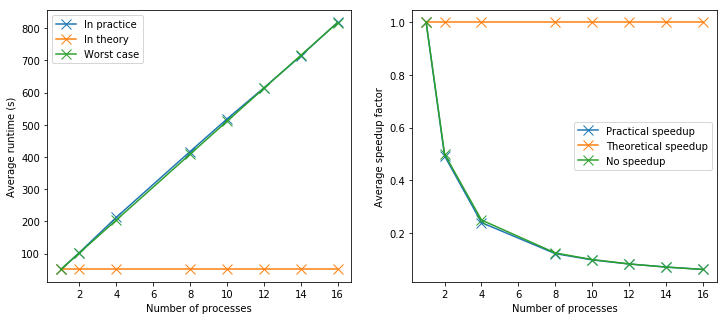

In [31]:
# Plot average time as a function of process number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueProcesses = groupby_df['Number of processes'].unique()
for index,i in enumerate(uniqueProcesses):
    condition = (groupby_df['Number of processes'] == i) & (groupby_df['Number of threads'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)
meanTimePerNbThreads

    
meanTime = [x for y, x in sorted(zip(uniqueProcesses, meanTimePerNbThreads))]
nbProcess = sorted(uniqueProcesses)
theoreticalMeanTime = [meanTime[0]] * len(nbProcess)
worstTime = nbProcess * meanTime[0]
print(meanTime)
print(theoreticalMeanTime)
print(nbProcess)
ax1.plot(nbProcess, meanTime, marker='x',markersize=10)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.plot(nbProcess, worstTime, marker='x',markersize=10)

ax1.set(ylabel="Average runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory", "Worst case"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
worstSpeedup = list(map(lambda x : 1/x, nbProcess))
print(worstSpeedup)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, [1]*len(nbProcess), marker='x',markersize=10)
ax2.plot(nbProcess, worstSpeedup, marker='x',markersize=10)
ax2.set(ylabel="Average speedup factor", xlabel="Number of processes")
# ax2.set_ylim([0.8,1.2])
ax2.legend(["Practical speedup", "Theoretical speedup", "No speedup"], loc  ='best')

fig.savefig("Implicit_weakscaling_processes_runtime_speedup.svg")

## 2.2.2 Plot average time as a function of thread number


[1, 2, 4, 8, 10, 12, 14, 16]
Meantime :
 [array([332.46389]), array([344.186569]), array([359.261695]), array([362.043816]), array([382.578593]), array([422.580199]), array([406.320679]), array([402.2758745])]
theoreticalMeanTime :
 [array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389]), array([332.46389])]
worstTime :
 [ 332.46389  664.92778 1329.85556 2659.71112 3324.6389  3989.56668
 4654.49446 5319.42224]
[array([1.]), array([0.96594092]), array([0.92540868]), array([0.91829739]), array([0.86900808]), array([0.78674744]), array([0.8182303]), array([0.82645744])]
[1, 2, 4, 8, 10, 12, 14, 16]
[1.0, 0.5, 0.25, 0.125, 0.1, 0.08333333333333333, 0.07142857142857142, 0.0625]


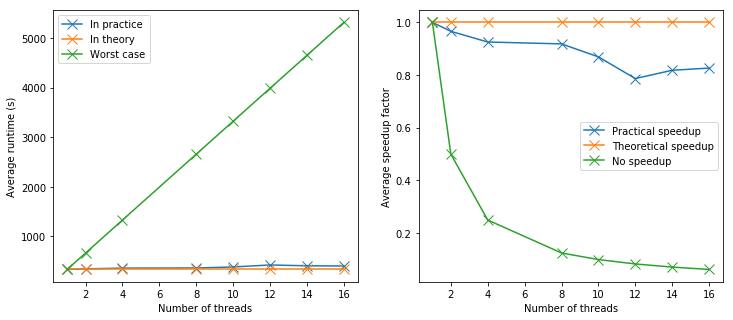

In [65]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
uniqueThreads = groupby_df['Number of threads'].unique()
for index,i in enumerate(uniqueThreads):
    condition = (groupby_df['Number of threads'] == i) & (groupby_df['Number of processes'] == 1)
    meanTimePerNbThreads.append(groupby_df[condition]['Time per process'].values)

meanTimePerNbThreads

    
meanTime = [x for y, x in sorted(zip(uniqueThreads, meanTimePerNbThreads))]
nbThreads = sorted(groupby_df['Number of threads'].unique())
worstTime = nbThreads * meanTime[0]
theoreticalMeanTime = [meanTime[0]] * len(nbThreads)
print(nbThreads)
print('Meantime :\n', meanTime)
print('theoreticalMeanTime :\n',theoreticalMeanTime)
print('worstTime :\n', worstTime)
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.plot(nbThreads, worstTime, marker='x',markersize=10)
ax1.set(ylabel="Average runtime (s)",xlabel="Number of threads")
ax1.legend(["In practice","In theory", "Worst case"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])

print(speedUp)
print(nbThreads)
worstSpeedup = list(map(lambda x : 1/x, nbThreads))
print(worstSpeedup)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, [1]*len(nbThreads), marker='x',markersize=10)
ax2.plot(nbProcess, worstSpeedup, marker='x',markersize=10)

ax2.set(ylabel="Average speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup", "No speedup"], loc  ='best')

fig.savefig("Implicit_weakscaling_threads_runtime_speedup.svg")